# 04-1 로지스틱 회귀

* 로지스틱 회귀 : 선형 방정식을 사용한 **분류** 알고리즘
* 다중 분류 : 타깃 클래스가 2개 이상인 분류 문제 시그모이드 함수와 소프트맥스 함수를 사용하여 클래스를 예측
* 시그모이드 함수 : 선형 방정식의 출력을 0과 1시아의 값으로 압축하여 이진 분류를 위해 사용  
* 소프트맥스 함수 : 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만드는 함수

![[혼자 공부하는 머신러닝+딥러닝] 9강. 로지스틱 회귀 알아보기 10-5 screenshot.png](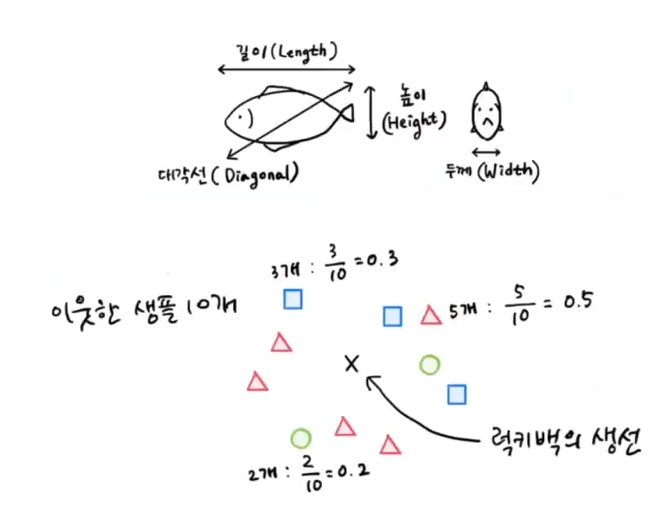)

## Data 준비

* target : Species (물고기종류 - 7개)
* 특성데이터 : 'Weight', 'Length', 'Diagonal', 'Height', 'Width' (속성)


In [ ]:
import pandas as pd
fish = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fish.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## 어떤 종류의 생선이 있는지 고유값 추출


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:


from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


## K-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


정확성(Accuracy)

In [ ]:
# Calculate training accuracy
train_accuracy = kn.score(train_scaled, train_target)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = kn.score(test_scaled, test_target)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.8907563025210085
Test Accuracy: 0.85


7개의 종류의 생선  다중 분류 (multi-class classification )

In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


5개의 샘플을 추출해줘  (predict)

In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # 확률을 출력하려는 메서드 predict_proba
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


5개의 샘플이 출력되고 , 7생선의 확률이 나옴


![[혼자 공부하는 머신러닝+딥러닝] 9강. 로지스틱 회귀 알아보기 22-1 screenshot.png](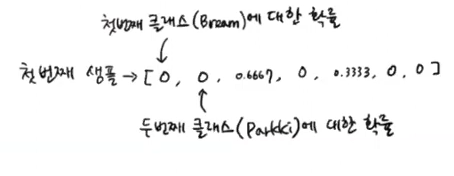)


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀 설명

분류모델

z = a * (Weight) + b * (Lenght) + c * (Diagonal) + d * (height) + e * (Width) + f

f 절편
![[혼자 공부하는 머신러닝+딥러닝] 9강. 로지스틱 회귀 알아보기 23-57 screenshot.png](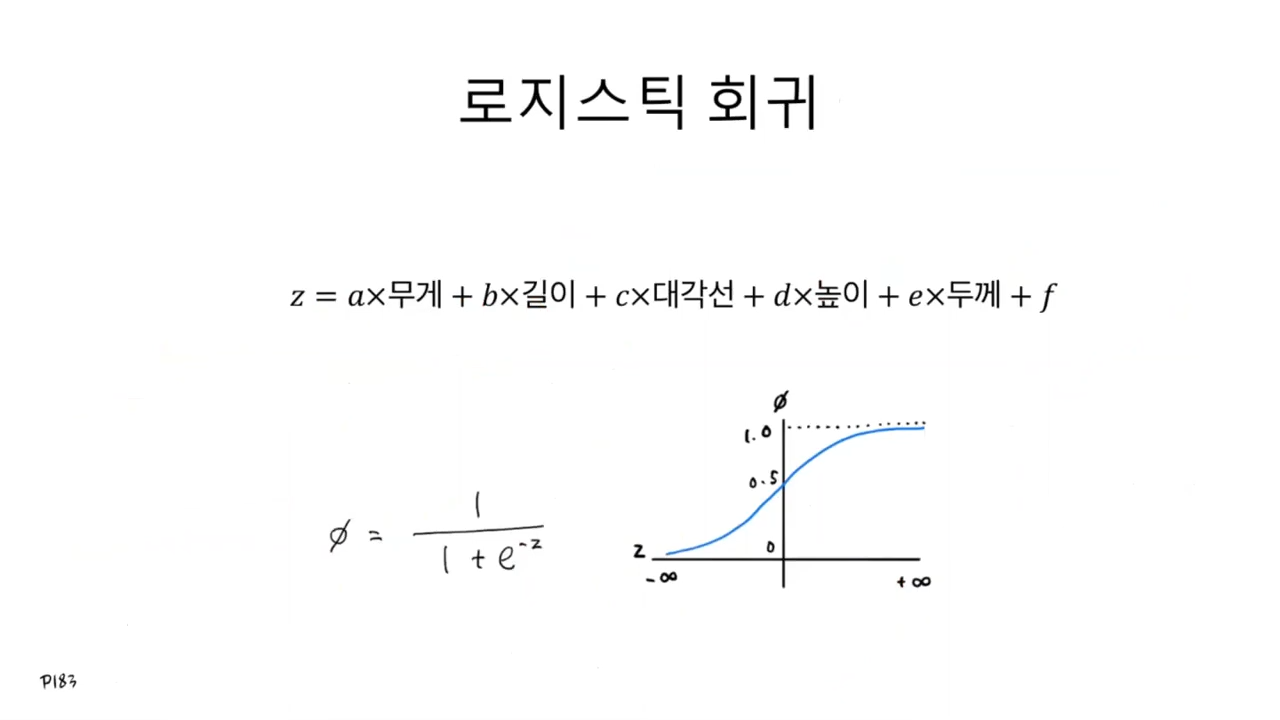)

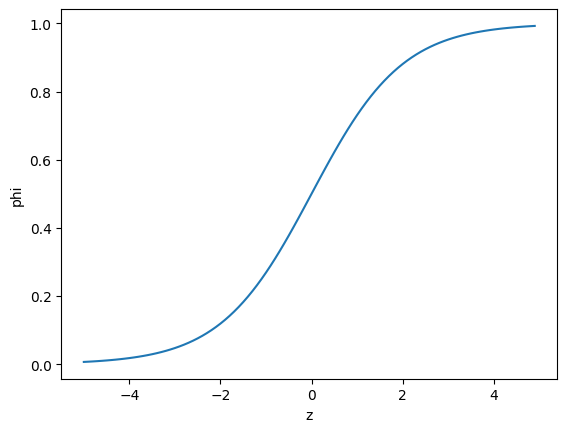

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / ( 1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

S 모양이라서 시그모이드 함수라고 부름

시그모이드 = 로지스틱함수

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


## 이진 분류

Bream (도미) | Smelt (빙어) 만 뽑아내기 위해서

훈련데이터에 넣어준다.



In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


확률 출력

음성 | 양성

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


## 로지스틱 회귀(다중 분류)

로지스틱 회귀 계수 확인

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


z 값을 출력해주는 decision_function 메서드 (Sigmoid)

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


expit 는 시그모이드 함수
추출값

In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


C=20 : 매개변수 L2 노름 규제 기본 적용하기 위해 C값을 20 적용  
(규제를 풀어주기 위해서 C를 20으로 설정, 반복학습을 많이 할 수 있도록 iter를 1000으로 늘렸음)

C 값이 올라가면 규제가 약해지고, 낮아지면 강해진다.

C 의 기본 값 1



In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:




print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


5개의 샘플 , 7개의 확률이 제공 (생선이 7개여서)

z 값 7개의 확률을 만들어 냄



In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))


[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:



print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


## 소프트맥스 함수

5개의 샘플에 대해서 z 값 7개 출력

소프트 맥스 함수는 여러개 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다.   
이를 위해서 지수 함수를 사용하기 떄문에 **정규화된 지수 함수** 라고 부른다.

In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 04-2 확률적(랜덤) 경사(기울기) 하강법
무작위 하게 경사를 내려가는 방법(가장 가파른 경사로 최적점까지 조금씩 내려간다)

기존 모델을 유지 하면서 업데이트 할수 없을지에서 출발  
점진적 학습 :
온라인 학습 : 모델을 서비스 하는 도중에 학습 하면서 서비스 진행


ML/DL 방법을 훈련하는 방법 (최적화)  

![[혼자 공부하는 머신러닝+딥러닝] 10강. 확률적 경사 하강법 알아보기 19-45 screenshot.png](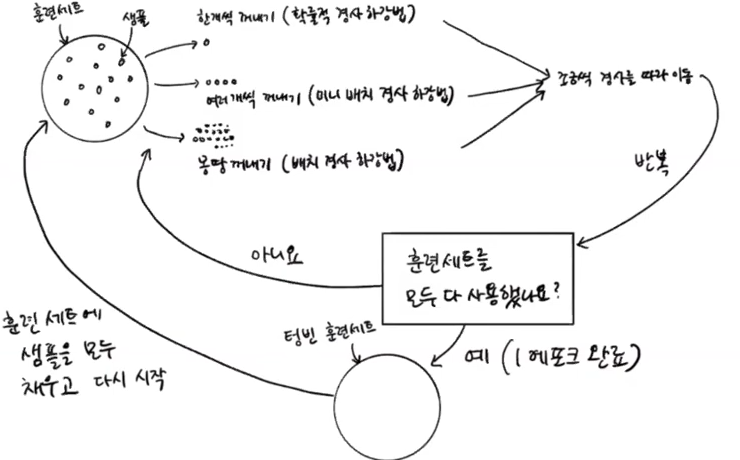)


* 확률적 경사 하강법 (한개씩)
* 미니 배치 경사 하강법 (여러개씩 꺼내기)
* 배치 경사 하강법 (몽땅 꺼내기)

-> 몇개씩 꺼내서 사용 (1 개의 작업 1헤포크 )
why? 리소스의 한계 때문에



**손실함수** : 나쁜 정도 측정 함수

손실이 많을 수록 정확하지 않다.
미분가능하지 않다

**로지스틱 손실 함수** :  

![[혼자 공부하는 머신러닝+딥러닝] 10강. 확률적 경사 하강법 알아보기 31-6 screenshot.png](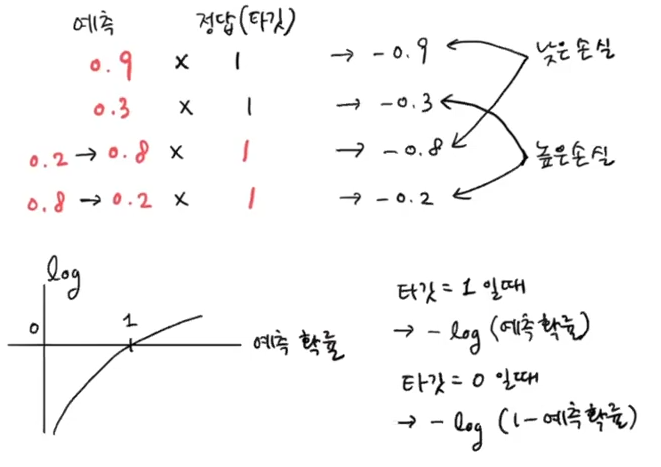)  
정확도를 높이기 위해서, 로지스틱 손실 함수를 사용

## SGD Classifier
Stochastic Gradient Descent

# New Section

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

* Species 열을 제외한 나머지 5개를 사용

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

데이터 세트와 훈련세트로 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

전처리

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


![[혼자 공부하는 머신러닝+딥러닝] 10강. 확률적 경사 하강법 알아보기 46-59 screenshot.png](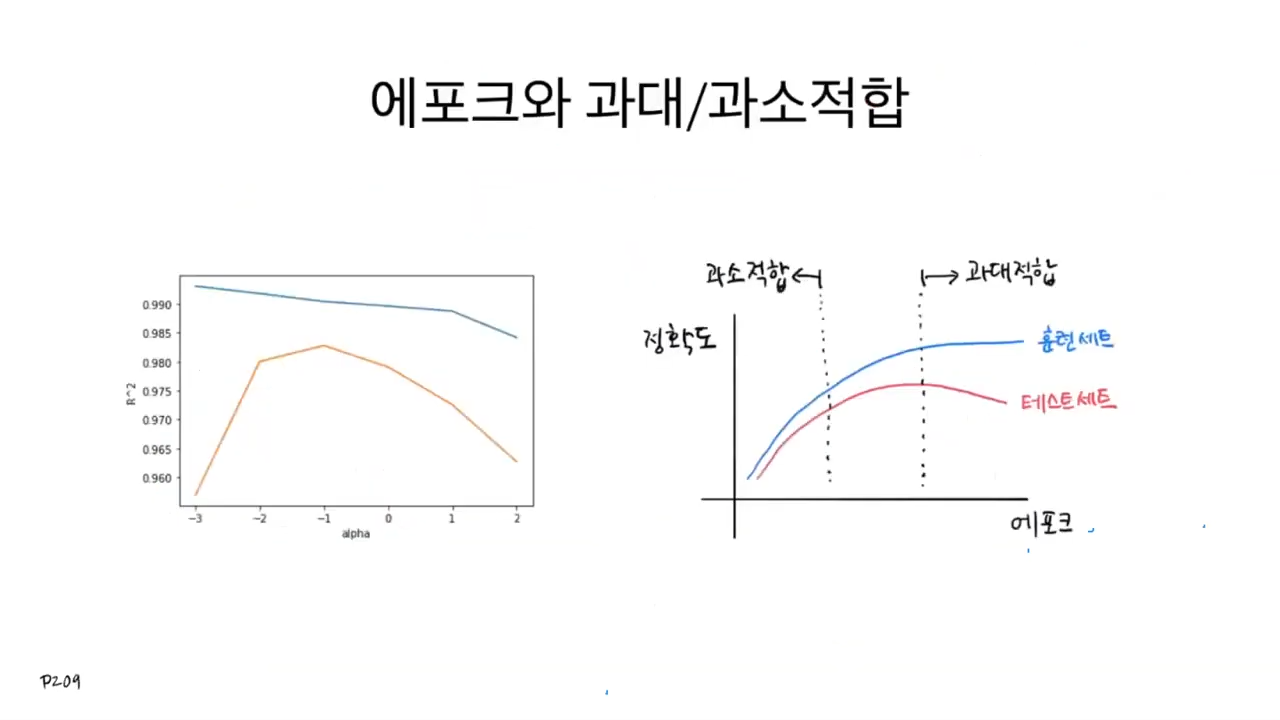)

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


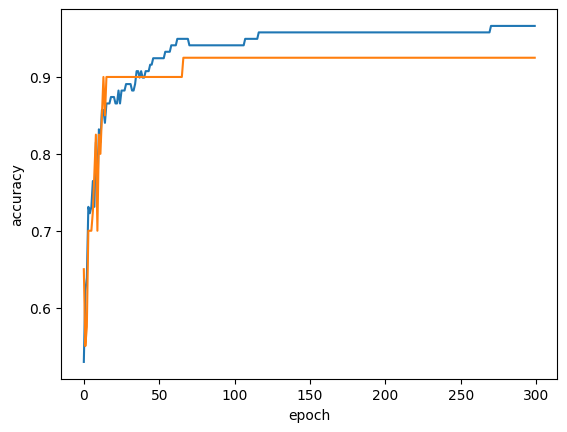

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
